In [1]:
#Pretty Display of Variables
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#%autoreload

# Import libraries

In [3]:
from plot_projections import *
from prop_info import extreme_points, vect_blade, d_blade, center_prop
from get_segments import blade_alone, get_segments_points, get_planes
from major_axis import get_major_axis
#from projections import couple_all_planes, project_all_couples, projections_by_side, project_couple
from new_projections import *
from parameters import get_hub_points, get_hub_radius
from plot_param import plot_hub
from plot_prop import plot_pointcloud, plot_direction, plot_segments
from myMathFunction import *
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

# Pre-processing

In [4]:
propeller_coords = pd.read_csv('aerostar_data.csv')
propeller_coords.shape

(151986, 3)

In [5]:
propeller_coords = propeller_coords.drop_duplicates(subset=None, keep='first', inplace=False)
propeller_coords = propeller_coords.reset_index(drop=True)

In [6]:
max_point, min_point, middle_point, highest_point, lowest_point = extreme_points(propeller_coords)

vect_length = vect_blade(max_point, min_point) 

dmiddle, dhighest, dlowest = d_blade(vect_length, middle_point, highest_point, lowest_point)

upper_blade, lower_blade = blade_alone(propeller_coords, vect_length, dmiddle)

vect_out, vect_side, hub_inner_radius = get_major_axis(propeller_coords, middle_point, vect_length)

# Projections

In [7]:
nb_seg = 3
resolution = 3
nb_points = 100

planes = get_planes(upper_blade, dmiddle, dhighest, vect_length, nb_seg)
segments = get_segments_points(upper_blade, planes, nb_seg)
#plot_segments(segments)

up, down = get_all_points_for_projections(planes, segments, nb_seg, resolution)

In [8]:
up1 = up[0]
dn1 = down[0]
plan1 = planes[1]
#print(up1.shape)

In [9]:
type(plan1)

numpy.ndarray

In [10]:
# 1. Find border points
up_side1_border, up_side2_border, _, _, _ = extreme_points(up1)
dn_side1_border, dn_side2_border, _, _, _ = extreme_points(dn1)
#print("up_right {}\n".format(up_right))

In [11]:
# 2. Find separating plane  -- least squares
C_up = find_separation_plane(up1.values)
C_dn = find_separation_plane(dn1.values)
# Z = C[4]*X**2. + C[5]*Y**2. + C[3]*X*Y + C[1]*X + C[2]*Y + C[0]
#print("C_up {}\n".format(C_up))

In [12]:
# 3. Assign point to side  (do it for both sides on both sides)
up_right_points, up_left_points = assign_points(C_up, up1)
dn_right_points, dn_left_points = assign_points(C_dn, dn1)
#print("right_points_up_shape {}\n".format(up_right_points.shape))

In [13]:
# Add border points to fit
up_right_points = add_border_points(up_right_points, up_side1_border, up_side2_border)
up_left_points  = add_border_points(up_left_points,  up_side1_border, up_side2_border)
dn_right_points = add_border_points(dn_right_points, dn_side1_border, dn_side2_border)
dn_left_points  = add_border_points(dn_left_points,  dn_side1_border, dn_side2_border)
#print("up_right_points_shape {}\n".format(up_right_points.shape))

In [16]:
up_right_points

,X,Y,Z
0,23.543001,9.708630,-5.702528
1,23.552040,9.756717,-5.704985
2,22.536331,9.944106,-5.727931
3,22.544565,9.992298,-5.725188
4,21.676811,10.138585,-5.735893
5,21.684216,10.186314,-5.728091
6,21.623938,9.804749,-5.651988
7,21.843330,9.719636,-5.611176
8,22.485903,9.659850,-5.638765
9,22.779331,9.558097,-5.593581


In [20]:
up_right_points.sort_values('X').reset_index(drop=True)

,X,Y,Z
0,21.349756,5.398490,-2.270056
1,21.367199,5.663430,-2.459020
2,21.382610,1.035831,1.421657
3,21.384632,5.928214,-2.648111
4,21.410805,6.325424,-2.932945
5,21.432659,6.656388,-3.172067
6,21.454201,6.981657,-3.409343
7,21.475847,7.307236,-3.649732
8,21.497450,7.630637,-3.892007
9,21.519001,7.951517,-4.136468


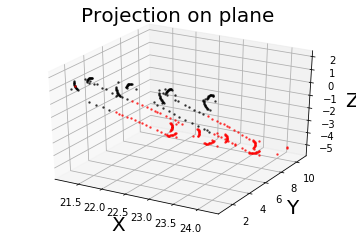

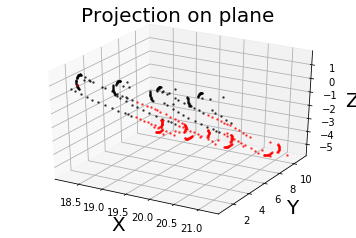

In [14]:
plot_projection_up_down(up_right_points, up_left_points)
plot_projection_up_down(dn_right_points, dn_left_points)

In [15]:
# 4. Interpolate points
up_right_popt = interpolate_points(up_right_points)
up_left_popt = interpolate_points(up_left_points)
dn_right_popt = interpolate_points(dn_right_points)
dn_left_popt = interpolate_points(dn_left_points)

In [18]:
data = np.meshgrid(up_right_points.values[:,0], up_right_points.values[:,1])

In [26]:
data[1]

array([[  9.70862961,   9.70862961,   9.70862961, ...,   9.70862961,
          9.70862961,   9.70862961],
       [  9.75671673,   9.75671673,   9.75671673, ...,   9.75671673,
          9.75671673,   9.75671673],
       [  9.9441061 ,   9.9441061 ,   9.9441061 , ...,   9.9441061 ,
          9.9441061 ,   9.9441061 ],
       ..., 
       [  5.39849043,   5.39849043,   5.39849043, ...,   5.39849043,
          5.39849043,   5.39849043],
       [ 10.6015625 ,  10.6015625 ,  10.6015625 , ...,  10.6015625 ,
         10.6015625 ,  10.6015625 ],
       [  1.03583074,   1.03583074,   1.03583074, ...,   1.03583074,
          1.03583074,   1.03583074]])

In [16]:
plot_interpolation_side(up_side1_border, up_side2_border, up_right_popt, "1")
plot_interpolation_side(up_side1_border, up_side2_border, up_left_popt, "2")
plot_interpolation_side(dn_side1_border, dn_side2_border, dn_right_popt, "3")
plot_interpolation_side(dn_side1_border, dn_side2_border, dn_left_popt, "4")

TypeError: model_func() missing 2 required positional arguments: 'g' and 'h'

In [17]:
# 5. Final projection
# Take points on each side
up_right_pts = points_from_curve(up_side1_border, up_side2_border, nb_points, up_right_popt)
dn_right_pts = points_from_curve(dn_side1_border, dn_side2_border, nb_points, dn_right_popt)

up_left_pts = points_from_curve(up_side1_border, up_side2_border, nb_points, up_left_popt) 
dn_left_pts = points_from_curve(dn_side1_border, dn_side2_border, nb_points, dn_left_popt)

TypeError: model_func() missing 2 required positional arguments: 'g' and 'h'

In [ ]:
#Careful dataframe leads to eror in next function
df_up_right_pts = pd.DataFrame(up_right_pts, columns = ["X","Y","Z"])
df_up_left_pts  = pd.DataFrame(up_left_pts,  columns = ["X","Y","Z"])
df_dn_right_pts = pd.DataFrame(dn_right_pts, columns = ["X","Y","Z"])
df_dn_left_pts  = pd.DataFrame(dn_left_pts,  columns = ["X","Y","Z"])

# plot of 5a points
plot_projection_up_down(df_up_right_pts, df_up_left_pts)
plot_projection_up_down(df_dn_right_pts, df_dn_left_pts)

In [18]:
# Projection de la ligne reliant 2 points sur le plan
proj_right_df, proj_left_df = project_points_on_plane(up_right_pts, dn_right_pts, up_left_pts, dn_left_pts, plan1)

NameError: name 'up_right_pts' is not defined

In [ ]:
# plot of 5b points projected
plot_projection_up_down(proj_right_df, proj_left_df)

In [ ]:
# 6. Interpolation surfacce
popt_right = interpolate_points(proj_right_df)
popt_left = interpolate_points(proj_left_df)

In [ ]:
# plot of 6 on plan